### Come funziona l'algoritmo k-means?
L'algoritmo segue questi passi:
1.	Selezione del numero di cluster (k): L'utente sceglie il numero di cluster, cioè il valore di K, che rappresenta il numero di gruppi desiderati. Questo è un parametro da definire in anticipo.
2.	Inizializzazione dei centroidi: Si selezionano kkk punti casuali nel dataset (o basati su un criterio) per inizializzare i centroidi iniziali, ossia i centri di ciascun cluster.
3.	Assegnazione dei punti ai cluster: Ogni punto dei dati viene assegnato al cluster il cui centroide è il più vicino in base a una misura di distanza, di solito la distanza euclidea.
4.	Aggiornamento dei centroidi: Per ciascun cluster, si ricalcola il centroide come il punto medio (media) di tutti i punti assegnati a quel cluster.
5.	Iterazione: I passaggi 3 e 4 vengono ripetuti fino a quando i centroidi non cambiano più significativamente (ossia, l'algoritmo converge) o si raggiunge un numero massimo di iterazioni.
L'algoritmo cerca di minimizzare la somma delle distanze quadrate tra i punti di ciascun cluster e il rispettivo centroide. Questa somma rappresenta una misura di qualità del clustering: più è bassa, più i punti sono raggruppati in modo compatto.


Limiti di k-means
- Specificare k in anticipo: serve conoscere il numero di cluster.
- Sensibilità ai punti iniziali: la scelta dei centroidi iniziali influisce sul risultato.
- Adatto a cluster sferici: non funziona bene con cluster di forma irregolare.
- Sensibile agli outlier: gli outlier possono distorcere il calcolo dei centroidi.

Varianti di k-means
Una variante comune è il k-means++, che migliora la fase di inizializzazione scegliendo i centroidi iniziali in modo più strategico.

### K-means in Scikit-Learn
L'algoritmo KMeans di Scikit-Learn ha diversi parametri configurabili che consentono di personalizzare il comportamento dell'algoritmo per adattarsi meglio ai tuoi dati e alle tue esigenze di clustering. Ecco una panoramica dei parametri principali:

Parametri principali di KMeans
1. n_clusters:
- Numero di cluster che si desidera ottenere.
- Valore di default: 8.

2. init:

- Metodo di inizializzazione dei centroidi. Può essere:
- 'k-means++': metodo di inizializzazione che migliora la selezione dei centroidi iniziali per accelerare la convergenza (default).
- 'random': centroidi inizializzati casualmente.
- Array numpy personalizzato: è possibile fornire un array di centroidi iniziali.

3. n_init:

- Numero di volte in cui l'algoritmo viene eseguito con diverse inizializzazioni dei centroidi, prendendo poi il risultato con la migliore somma dei quadrati delle distanze (intra-cluster inertia).
- Valore di default: 10.

4. max_iter:

- Numero massimo di iterazioni per ciascuna esecuzione dell’algoritmo k-means.
- Valore di default: 300.

5. tol:

- Tolleranza per il criterio di convergenza, cioè il valore minimo di variazione nei centroidi al di sotto del quale l'algoritmo si considera convergente.
- Valore di default: 1e-4.

6. random_state:

- Determina la riproducibilità dei risultati quando si usa la stessa inizializzazione.
- Può essere un numero intero o None.

7. algorithm:

- Specifica l'algoritmo da utilizzare. Può essere:
- 'lloyd': algoritmo standard di Lloyd per k-means.
- 'elkan': ottimizzazione per il calcolo delle distanze che accelera l’algoritmo, ma funziona solo se la distanza è euclidea e per alcuni tipi di dati.
- 'auto': seleziona automaticamente l'algoritmo più efficiente in base ai dati e alla metrica scelta.
- Valore di default: 'lloyd'.


Altri parametri utili
1. verbose:

Livello di dettaglio dell’output (se maggiore di 0, mostra dettagli dell’algoritmo durante l’esecuzione).

2. copy_x:

Se True, copia i dati prima di fare il clustering, altrimenti i dati originali potrebbero essere modificati.

3. n_jobs:

Numero di processi da utilizzare per il calcolo parallelo. (Attenzione che in Scikit-Learn recenti, il parametro n_jobs non è più supportato, e la parallelizzazione è gestita automaticamente).

### Pre-processing
K-means si basa sulla distanza euclidea, per cui le feature devono essere numeriche e continue. Se hai feature categoriali (come colori, città, ecc.), non è consigliabile usare k-means direttamente, poiché la distanza euclidea non è significativa per queste variabili. In questi casi, si potrebbe:
- Convertire le variabili categoriali in numeriche con metodi come l'embedding o il one-hot encoding (se ha senso nel contesto).


K-means è sensibile alla scala dei dati: feature con scale molto diverse possono dominare il calcolo delle distanze. Per evitare questo problema, è necessario normalizzare o standardizzare i dati:
- Normalizzazione (min-max scaling): scala le feature in un intervallo fisso, tipicamente [0,1][0, 1][0,1], per mantenere i valori tra limiti specifici.
- Standardizzazione: trasforma le feature in modo che abbiano una media di 0 e deviazione standard di 1.

Gli outlier possono influire negativamente sui centroidi perché distorcono la media, che è alla base del calcolo dei centroidi in k-means. Gli outlier spesso causano la formazione di cluster "distorti" o disallineati rispetto alla distribuzione principale dei dati. Per questo motivo, conviene:
- Rimuovere o mitigare gli outlier (con metodi come l'analisi delle distribuzioni, z-score, ecc.).

K-means tende a identificare cluster di forma sferica (cioè gruppi di dati che si distribuiscono intorno al centroide in modo simmetrico). Se i tuoi dati hanno cluster di forma complessa o allungata, k-means potrebbe non essere ideale.



### Determinare il numero ottimale di cluster K
Esistono vari metodi per scegliere 𝐾, ma due dei più comuni sono il metodo del gomito e il coefficiente di silhouette.

- Metodo del gomito
Esegui k-means per vari valori di K (ad esempio, da 1 a 10).
Calcola la somma delle distanze quadrate (intra-cluster inertia) per ciascun 𝐾. Questa somma rappresenta quanto ogni punto si trova vicino al centro del cluster assegnato.
Traccia un grafico con i valori di 𝐾 sull'asse X e l'inertia sull'asse Y.
Cerca il "gomito" del grafico, cioè il punto in cui la riduzione dell'inertia inizia a diventare meno pronunciata. Questo punto rappresenta un buon compromesso tra coesione e separazione dei cluster.

- Coefficiente di silhouette
Il coefficiente di silhouette misura quanto ciascun punto è vicino ai punti del proprio cluster rispetto a quelli di altri cluster.
Il valore del coefficiente va da -1 a 1, dove un valore vicino a 1 indica che i punti sono ben assegnati ai cluster, mentre valori vicini a 0 o negativi indicano che i punti sono vicini a più cluster o assegnati male.
Calcola il coefficiente di silhouette per ciascun valore di K e scegli quello che massimizza il valore medio di silhouette.

### Determinare il numero di iterazioni
Il parametro max_iter controlla il numero massimo di iterazioni per cui l'algoritmo k-means dovrebbe aggiornare i centroidi e riassegnare i punti ai cluster. Scikit-Learn utilizza un valore predefinito di 300, che in genere è sufficiente per la maggior parte dei casi. 
Alcune considerazioni per decidere il numero di iterazioni:

- Convergenza: k-means di solito converge molto prima di raggiungere il numero massimo di iterazioni. Se osservi che l’algoritmo converge in meno iterazioni, puoi abbassare max_iter.
- Monitoraggio: imposta un valore elevato (es. 300 o più) se non sei sicuro. Se l’algoritmo non converge entro questo limite, potresti provare a modificare l'inizializzazione dei centroidi (usando k-means++) o a cambiare il valore di K.
- Tol: Il parametro tol rappresenta la tolleranza per considerare che i centroidi non cambiano più (criterio di convergenza). Ridurre il valore di tol (ad esempio, 1e-6 invece di 1e-4) può richiedere più iterazioni, ma migliorare la precisione.

In pratica, non è sempre necessario specificare manualmente il numero di iterazioni. Di solito, la combinazione k-means++ e tol aiuta l’algoritmo a convergere velocemente, e puoi lasciare max_iter a un valore elevato senza preoccupazioni.

### Gestire l'inizializzazione dei centroidi

### Inizializzazione casuale

L'inizializzazione casuale è il metodo più semplice: i centroidi iniziali vengono scelti casualmente tra i punti del dataset. Tuttavia, questa tecnica può risultare problematica poiché, se i centroidi sono troppo vicini o male distribuiti, l'algoritmo può convergere a una soluzione subottimale.

### Inizializzazione con k-means++

L'inizializzazione k-means++ è la tecnica standard in Scikit-Learn ed è progettata per posizionare i centroidi iniziali in modo più strategico, massimizzando la distanza tra i centroidi iniziali. Questa tecnica riduce la probabilità di cluster vuoti e migliora la velocità di convergenza, rendendo k-means più efficace.

Come funziona k-means++:

1. Il primo centroide viene scelto casualmente tra i punti del dataset.
2. Per ogni punto, calcola la distanza dal centroide più vicino.
3. I punti più distanti dai centroidi esistenti hanno una probabilità maggiore di essere scelti come centroidi successivi.
4. Ripeti il processo fino a ottenere K centroidi.

### Inizializzazione basata su campionamento e clustering gerarchico
Se k-means++ non funziona bene per dataset specifici, un altro approccio è inizializzare i centroidi con un metodo di clustering gerarchico (ad esempio, agglomerativo) per ottenere una distribuzione preliminare dei centroidi.

Procedura:
1. Esegui un clustering gerarchico per ottenere una suddivisione preliminare dei dati.
2. Utilizza i centroidi dei cluster gerarchici come punto di partenza per i centroidi di k-means.
3. Esegui k-means con questi centroidi iniziali.

Questo approccio può funzionare meglio in dataset complessi, specialmente in presenza di cluster di forma e densità diverse.

### Inizializzazione con metodi basati su distanza massima
Un'alternativa utile è selezionare i centroidi iniziali in modo tale che siano il più distanti possibile l'uno dall'altro. Questo metodo è simile a k-means++, ma più semplice.

Procedura:
1. Scegli un punto casuale come primo centroide.
2. Seleziona il punto più distante dal centroide esistente come il prossimo centroide.
3. Ripeti fino ad avere K centroidi.

Questo metodo è meno sofisticato di k-means++ ma può essere efficace per evitare posizioni di centroidi troppo vicine.

### Inizializzazione con metodi basati su PCA
Per dati ad alta dimensionalità, puoi ridurre la dimensionalità con PCA e usare le coordinate dei componenti principali per ottenere i centroidi iniziali.

Procedura:
1. Applica PCA sul dataset e riducilo a un numero inferiore di dimensioni (ad esempio, 2 o 3).
2. Esegui k-means sui dati ridotti e usa i centroidi trovati come centroidi iniziali per k-means sull’intero dataset.

### Sulla natura dei dati

Le caratteristiche intrinseche dei dati possono influenzare significativamente i risultati del clustering e la scelta dell’algoritmo.

1. Misura di prossimità o densità:

- Le misure di distanza (come la distanza euclidea) sono fondamentali per molti algoritmi di clustering, come k-means. Tuttavia, il tipo di metrica usata dovrebbe adattarsi alle caratteristiche dei dati e all'applicazione. Per dati con relazioni particolari (come dati spaziali o temporali), una misura di prossimità standard potrebbe non catturare correttamente la struttura dei cluster.

2. Caratteristiche dei dati che influenzano la prossimità e/o la densità:

- Dimensionalità: Nei dati ad alta dimensionalità, molte metriche di distanza diventano meno informative, perché i punti tendono a diventare equidistanti tra loro. Inoltre, la presenza di molte dimensioni rende i dati più sparsi, riducendo l’efficacia di algoritmi come k-means.
- Tipo di attributo: Se i dati includono attributi categoriali o ordinali, le metriche di distanza come quella euclidea non sono adatte, richiedendo altre misure o adattamenti.
- Relazioni speciali: Se i dati sono correlati (ad esempio, con autocorrelazione in dati temporali o spaziali), la prossimità calcolata in modo tradizionale potrebbe non rappresentare la vera struttura del cluster.

3. Distribuzione dei dati:

- Se i dati non sono distribuiti in modo simile (ad esempio, con densità diverse o forme di cluster non sferiche), algoritmi come k-means potrebbero non funzionare bene. Alcuni algoritmi (come DBSCAN) sono più adatti a dati con distribuzioni irregolari.

4. Rumore e outlier:

- Outlier o rumore possono distorcere i risultati di molti algoritmi di clustering, in quanto influenzano i centroidi o le medie dei cluster.


Impatto della correlazione sui dati e il clustering

- Se i dati sono correlati, ci sono diverse sfide:

Metriche di distanza inappropriate: Nei dati correlati, due variabili possono rappresentare informazioni simili, e la loro combinazione potrebbe dare più peso a un'informazione rispetto ad altre. Questo può confondere la misura di distanza e portare a cluster meno precisi.
- Autocorrelazione: Nei dati temporali o spaziali, i punti vicini tendono a essere più simili tra loro rispetto ai punti lontani. Usare una semplice misura di distanza potrebbe quindi non catturare questa struttura e portare a cluster che non riflettono le relazioni spaziali o temporali reali.

Come affrontare la correlazione nei dati di clustering

Per dati con forte correlazione, ecco alcune strategie utili:

- Riduzione della dimensionalità: Tecniche come PCA (Principal Component Analysis) possono aiutare a ridurre la correlazione tra le variabili prima del clustering.
- Misure di distanza personalizzate: In alcuni casi, è possibile definire una misura di distanza che tenga conto della correlazione, come una distanza basata sulla correlazione stessa.


### Capire in anticipo se i cluster hanno forma sferica

1. Visualizzazione dei dati (se possibile)
Se i dati hanno due o tre dimensioni, puoi visualizzarli direttamente e osservare la loro struttura:

- Scatter plot: Per dati bidimensionali, un grafico scatter può mostrare se i cluster hanno forme allungate, curve o non sferiche.
- Riduzione della dimensionalità: Per dati ad alta dimensionalità, puoi usare tecniche di riduzione della dimensionalità come PCA o t-SNE per proiettare i dati in due o tre dimensioni e vedere se i cluster hanno forme irregolari -> Se i cluster sembrano avere forme allungate, curve o irregolari nella proiezione bidimensionale, è un buon indicatore che i cluster sono non sferici.

### Perché la varianza delle feature è importante in k-means?

1. Squilibrio tra feature:

Se una feature ha una varianza molto più alta delle altre, dominerà il calcolo della distanza euclidea. Questo può causare una distorsione nei cluster, poiché k-means cercherà di minimizzare le distanze in base a questa feature dominante, ignorando o minimizzando l'importanza delle altre.

2. Differenti scale:

La varianza elevata di una feature può essere dovuta a scale diverse tra le feature (ad esempio, una feature misurata in migliaia e un’altra in unità). K-means tende a dare maggiore peso alle feature con valori più grandi, causando cluster sbilanciati se le feature non sono sulla stessa scala.

3. PCA e riduzione della dimensionalità:

Se utilizzi PCA prima di k-means, la varianza viene ridistribuita nei componenti principali. È importante considerare quanta varianza mantenere (ad esempio, 90-95%) per assicurarti che i componenti principali contengano abbastanza informazioni utili per il clustering.

Come gestire la varianza nelle feature per k-means?
1. Standardizzazione delle feature
È buona pratica standardizzare o normalizzare le feature per ridurre l’impatto della varianza non bilanciata. Standardizzare significa trasformare ogni feature in modo che abbia media 0 e deviazione standard 1, rendendo tutte le feature comparabili. Questo evita che una feature con varianza alta domini il clustering.

2. Monitoraggio della varianza nella PCA
Se usi PCA per ridurre la dimensionalità prima di k-means, puoi monitorare la quantità di varianza spiegata da ciascun componente principale e scegliere il numero di componenti in modo che conservino una sufficiente quantità di informazione (tipicamente il 90-95% della varianza).

### Limitazioni di k-means su cluster di dimensioni o separazioni diverse
1. Differenze di dimensioni dei cluster: k-means assume che i cluster siano di dimensioni simili e sferici. Quando i cluster hanno dimensioni diverse, l'algoritmo tende a sbilanciarsi, poiché cerca di assegnare i punti al centroide più vicino senza tenere conto della diversa distribuzione dei dati tra i cluster.

2. Cluster non ben separati: Quando i cluster sono vicini o non ben separati, k-means può avere difficoltà a distinguerli. I cluster ben separati hanno generalmente una distanza elevata tra i centroidi o una distanza minima elevata tra i punti di ciascun cluster. Se questa distanza non è elevata, k-means può sovrapporre i cluster o assegnare punti al cluster sbagliato.

### Superare queste limitazioni con cluster più numerosi
Un modo per superare queste limitazioni è utilizzare un numero maggiore di cluster in k-means, quindi eseguire un'analisi successiva (post-processing) per unire i cluster più vicini. Questo approccio può aiutare a:

- Rilevare sotto-cluster all'interno di cluster più grandi o complessi, rappresentando meglio la struttura dei dati.
- Unire cluster vicini in un secondo momento, ad esempio valutando la distanza tra i centroidi o utilizzando una misura di contiguità (distanza minima tra i punti appartenenti a cluster diversi) per identificare quali cluster potrebbero essere considerati parte dello stesso gruppo.

### Procedura di post-processing
1. Dividere inizialmente in molti cluster: Avvia k-means con un numero elevato di cluster per rilevare sotto-strutture.

2. Calcolare le distanze tra i cluster: Dopo aver ottenuto i centroidi dei sotto-cluster, calcola le distanze tra di essi:

- Distanza tra i centroidi: Se due cluster hanno centroidi molto vicini, potrebbero essere parte dello stesso gruppo.
- Distanza tra punti più vicini (contiguità): Se la distanza minima tra i punti di due cluster è molto bassa, puoi considerare di unirli.

3. Unione dei cluster vicini: Utilizza una soglia di distanza per unire i cluster contigui e formare i cluster finali.

### Perché k-means fatica con cluster di densità diversa
1. istanza euclidea: k-means si basa sulla distanza euclidea, quindi cerca di trovare cluster di forma sferica e con densità simile. Cluster più densi tenderanno ad attrarre più punti vicini e potranno inglobare cluster meno densi vicini.

2. Distribuzione dei punti: Nei cluster a densità variabile, la distanza dal centroide non riflette accuratamente la "vicinanza" all'interno di un cluster. I punti dei cluster a bassa densità sono più distanti, e ciò può portare a una maggiore sovrapposizione tra cluster.

### Strategia per gestire cluster di densità diversa con k-means
1. Applicare k-means con un numero elevato di cluster:

Avvia k-means con un numero di cluster maggiore di quello atteso (ad esempio, 2-3 volte il numero di cluster che ti aspetti).
L'obiettivo è ottenere cluster più piccoli e compatti che rappresentino sotto-aree dei cluster principali, permettendo di catturare aree di diversa densità all'interno dello stesso cluster.

2. Misurare la vicinanza tra i cluster:

Dopo aver ottenuto i cluster, calcola la distanza tra i centroidi dei cluster oppure usa una misura di contiguità (ad esempio, la distanza tra i punti più vicini di due cluster).
Identifica i cluster vicini tra loro e che potrebbero appartenere allo stesso gruppo principale.

3. Unire i cluster vicini in gruppi finali:

Usa una soglia di distanza per decidere quali cluster unire. Puoi basarti su:

- Distanza tra centroidi: Se due centroidi sono molto vicini, probabilmente appartengono allo stesso cluster principale.
- Distanza minima tra punti (contiguità): Se due cluster hanno una bassa distanza tra i loro punti più vicini, possono essere considerati parte dello stesso gruppo.
- Dopo aver identificato i cluster vicini, uniscili in gruppi finali per rappresentare i cluster principali.

### Come si comporta k-means con cluster vuoti
1. Ricalcolo dei centroidi:

Se un cluster rimane vuoto in un'iterazione, k-means in Scikit-Learn (e in molte altre implementazioni) riassegna il centroide di quel cluster a una posizione diversa, basandosi su uno dei due metodi più comuni:

- Riposizionamento casuale: Il centroide vuoto viene assegnato a una posizione casuale all'interno del dataset.
- Riposizionamento al punto più distante: In alcune implementazioni, il centroide vuoto viene assegnato al punto più distante da tutti i centroidi esistenti, cercando di massimizzare la separazione dei cluster.

2. Continuazione del clustering:

Dopo il riposizionamento, l'algoritmo continua normalmente, riassegnando i punti ai centroidi e aggiornando i centroidi finché non si raggiunge la convergenza o il numero massimo di iterazioni.
I cluster vuoti possono essere problematici se si verificano in più iterazioni, segnalando che il numero di cluster scelto potrebbe essere troppo elevato per la struttura dei dati.

### Come gestire i cluster vuoti in k-means
Se noti che i cluster vuoti si verificano spesso, ci sono alcune azioni che puoi intraprendere:

1. Riduci il numero di cluster:

I cluster vuoti spesso indicano che il numero di cluster specificato è troppo alto rispetto alla struttura effettiva dei dati. Ridurre il valore di K potrebbe aiutare a evitare che alcuni cluster rimangano vuoti.

2. Controlla la distribuzione dei dati:

Se i dati hanno densità irregolari o aree vuote, potrebbe essere difficile per k-means formare cluster significativi in queste regioni. Considera di ridurre la dimensionalità o di eseguire un’analisi esplorativa per capire meglio la struttura dei dati.

3. Usa un metodo alternativo di inizializzazione dei centroidi:

Il metodo di inizializzazione k-means++ è una scelta migliore rispetto all'inizializzazione casuale, poiché cerca di posizionare i centroidi in modo più strategico e a distanze inizialmente ottimali. Questo riduce la probabilità di cluster vuoti e migliora la qualità della convergenza.

4. Post-processing:

Se hai bisogno di mantenere un certo numero di cluster, puoi applicare una logica di post-processing per rilevare e gestire i cluster vuoti, come il riposizionamento forzato dei centroidi nei punti più densi.

### Cluster validity

La Cluster Validity si valuta dopo aver eseguito l’algoritmo per misurare la qualità dei cluster finali e ottimizzare i parametri del modello, come K e max_iter. Ripetere l’algoritmo con configurazioni diverse e valutare la validità ti permette di scegliere la configurazione ottimale.

### Misure Interne
- WSS (Within-Cluster Sum of Squares): Somma delle distanze quadrate dei punti dai centroidi, quindi la coesione interna. Applicabile su dati numerici su cui è possibile calcolare distanze euclidee o altre metriche basate su centri dei cluster.
- BSS (Between-Cluster Sum of Squares): Distanza tra i centroidi e il centroide globale, pesata per la dimensione del cluster,  valutando la separazione. Applicabile a dati numerici dove sia possibile calcolare i centroidi e le distanze tra di essi.
- Rapporto BSS/WSS: Valori più alti indicano una buona separazione e coesione.
- Silhouette Score: Calcola quanto un punto è vicino ai punti del proprio cluster rispetto a quelli di altri cluster. La silhouette varia tra -1 e 1, dove valori più alti indicano una buona coesione e separazione. Applicabile a dati numerici o categorici codificati numericamente, purché sia possibile calcolare una distanza tra i punti.


### Misure esterne
- Via correlazione: La correlazione può essere utilizzata come misura esterna per valutare la somiglianza tra le assegnazioni di cluster e le etichette delle classi, specialmente quando i dati sono ordinali o numerici. L'idea è misurare quanto le etichette di cluster seguano l’andamento delle classi di riferimento.

1. Pearson: nel contesto del clustering, viene usata per quantificare la somiglianza lineare tra le etichette dei cluster e le classi. Dati numerici o ordinali. Le etichette devono avere un significato numerico (anche ordinali trasformate in numeriche) per ottenere risultati interpretabili. Valori vicini a +1 indicano una forte correlazione positiva lineare tra etichette di cluster e classi; valori vicini a 0 indicano poca o nessuna correlazione lineare.

2. Spearman:  Converte i valori in ranghi e calcola la correlazione tra questi. Dati ordinali o numerici su cui ha senso il concetto di rango. Valori vicini a +1 indicano una correlazione monotona positiva, mentre valori vicini a -1 indicano una correlazione monotona negativa. È utile per etichette di cluster e classi che seguono relazioni non lineari ma monotone. Spearman è preferibile a Pearson quando non è garantita una relazione lineare tra le etichette dei cluster e le classi.

3. Kendall Tau: valuta la concordanza nelle posizioni relative di coppie di punti nelle due variabili, misurando se l’ordine relativo tra due variabili è mantenuto. È molto robusta per dati con pochi valori distinti o ordinali. Dati ordinali, ideali per etichette numeriche con pochi valori distinti o quando si vuole minimizzare l’impatto di variazioni casuali. Valori vicini a +1 indicano forte concordanza nell’ordine delle etichette di cluster e delle classi, valori vicini a -1 indicano discordanza. Adatta per etichette ordinali o numeriche che presentano un ordine relativo tra classi e cluster.

    Raccomandazioni:

    Pearson è adatta solo quando esiste una relazione lineare tra etichette dei cluster e classi.
    Spearman è più flessibile e può gestire relazioni monotone non lineari, adatta per etichette numeriche o ordinali.
    Kendall Tau è preferibile per dati ordinali o con pochi valori distinti, misurando la concordanza nelle posizioni relative.
    Queste misure di correlazione ti permettono di valutare se i cluster seguono la struttura delle classi reali, offrendo una prospettiva utile sulla qualità del clustering rispetto alle etichette di riferimento.


- Entropy o purity: sono utilizzate per valutare quanto ciascun cluster sia "puro" rispetto alle classi di riferimento o quanto le classi siano distribuite nei cluster. Queste misure sono particolarmente utili per verificare se i cluster generati rispecchiano effettivamente le classi, misurando la coesione e la separazione tra cluster e classi.

1. Purità:  quanto ogni cluster sia composto da punti di una singola classe. Viene calcolata selezionando, per ogni cluster, la classe più rappresentata e sommando il numero di punti appartenenti a questa classe per tutti i cluster. Dati categoriali (etichette di riferimento e assegnazioni di cluster). Valori vicini a 1 indicano una forte corrispondenza tra i cluster e le classi, cioè i cluster sono composti principalmente da punti di una singola classe. Valori più bassi indicano che i cluster sono più "misti", contenendo punti di più classi.

2. Entropia: misura quanto le classi siano distribuite all'interno di ciascun cluster. Valori più bassi indicano cluster "puri" in cui una singola classe predomina, mentre valori più alti indicano che il cluster contiene punti di più classi. Dati categoriali (etichette di riferimento e assegnazioni di cluster). ntropia bassa indica cluster omogenei, ciascuno dominato da una sola classe, mentre un’entropia più alta indica cluster eterogenei.

    Confronto tra Purità ed Entropia
    - Purità: Misura quanto i cluster siano puri, ossia composti principalmente da punti di una singola classe. Più la purità è alta, meglio i cluster rappresentano classi uniche. Tuttavia, è una misura più semplice e potrebbe non essere sufficientemente sensibile per indicare mescolanze di classi minori.
    - Entropia: Misura la distribuzione delle classi all'interno dei cluster, quindi è utile per identificare cluster eterogenei. L’entropia è una misura più dettagliata rispetto alla purità, ma potrebbe essere più difficile da interpretare in alcuni casi.

In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from datasets import load_dataset
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

### All the features

In [7]:
dataset = load_dataset('csv', data_files='../dataset/merged_FE_no_outliers.csv')

df = dataset['train'].to_pandas()
# Calcolo della varianza per le feature numeriche nel nuovo dataset
numerical_features_new = df.select_dtypes(include=['float64', 'int64']).drop(columns=['birth_year'], errors='ignore')
variances_new = numerical_features_new.var()

# Mostriamo la varianza delle feature
variances_new.sort_values(ascending=False)

length                     4.113852e+09
climb_total                1.895707e+06
startlist_quality          1.428000e+05
uci_points                 1.572648e+04
delta                      1.256616e+04
delta_std                  1.192533e+04
points                     3.621609e+03
position                   2.332346e+03
climb_efficiency           2.332343e+03
team_avg_strength          7.096226e+02
year                       1.273314e+02
avg_delta                  9.739801e+01
finish_position_std        6.471003e+01
height                     3.917135e+01
weight                     3.835255e+01
cyclist_age                1.479147e+01
prestige_weighted_delta    3.648704e+00
PWR                        3.365553e+00
profile                    2.190296e+00
BMI                        1.661498e+00
race_difficulty            4.324832e-02
top_x_finish_percentage    1.076097e-02
time_gap                   6.554575e-05
consistency_score          1.671472e-05
dtype: float64

In [8]:
# Calcolo della matrice di correlazione per le feature numeriche
correlation_matrix = numerical_features_new.corr()

# Mostriamo la matrice di correlazione
correlation_matrix


,points,uci_points,length,climb_total,profile,startlist_quality,position,cyclist_age,delta,year,...,delta_std,top_x_finish_percentage,consistency_score,weight,height,BMI,PWR,climb_efficiency,time_gap,prestige_weighted_delta
points,1.000000,0.853342,0.363290,0.132852,-0.084936,0.165857,-0.074696,-0.014053,0.006522,-0.151348,...,0.000625,0.106486,0.004265,0.049365,0.018183,0.052966,0.846745,-0.074721,-0.001424,-0.013295
uci_points,0.853342,1.000000,0.360222,0.136147,-0.068276,-0.067435,-0.119541,-0.010874,0.007096,-0.032263,...,-0.002027,0.088754,0.009057,0.038787,0.023983,0.030597,0.993869,-0.119562,-0.001542,-0.010211
length,0.363290,0.360222,1.000000,0.536474,0.104751,0.074533,-0.012915,0.003193,0.012997,-0.048111,...,0.004425,0.043154,0.004307,0.026338,0.009500,0.028356,0.356475,-0.013038,-0.008474,0.002830
climb_total,0.132852,0.136147,0.536474,1.000000,0.687797,0.036470,-0.038109,0.002595,0.026806,0.017133,...,-0.001977,0.012830,0.003661,-0.014494,-0.002268,-0.018722,0.139744,-0.038199,-0.003840,0.017580
profile,-0.084936,-0.068276,0.104751,0.687797,1.000000,-0.066044,-0.015705,0.010718,0.023236,0.122796,...,-0.003864,-0.038206,-0.001122,-0.030813,-0.001688,-0.044064,-0.064713,-0.015761,-0.000671,0.019938
startlist_quality,0.165857,-0.067435,0.074533,0.036470,-0.066044,1.000000,0.145703,0.037555,-0.005077,-0.216792,...,-0.001697,0.076566,-0.021439,0.056553,0.016629,0.065781,-0.067185,0.145684,-0.002024,-0.010942
position,-0.074696,-0.119541,-0.012915,-0.038109,-0.015705,0.145703,1.000000,0.012024,0.008961,0.134739,...,0.014001,-0.297947,-0.034761,0.095590,0.074276,0.056390,-0.123718,1.000000,0.001188,0.009190
cyclist_age,-0.014053,-0.010874,0.003193,0.002595,0.010718,0.037555,0.012024,1.000000,-0.002841,0.151696,...,0.003186,0.033424,-0.010730,0.040151,-0.005381,0.064619,-0.013521,0.012024,0.000420,-0.001359
delta,0.006522,0.007096,0.012997,0.026806,0.023236,-0.005077,0.008961,-0.002841,1.000000,-0.002915,...,0.071138,0.000293,-0.001549,0.004420,0.003431,0.002705,0.006818,0.008960,0.758078,0.970606
year,-0.151348,-0.032263,-0.048111,0.017133,0.122796,-0.216792,0.134739,0.151696,-0.002915,1.000000,...,-0.020806,-0.296567,-0.055732,-0.052154,0.069376,-0.158894,-0.029719,0.134746,-0.001288,0.003265


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizzazione delle feature numeriche
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features_new)

# Applicazione della PCA
pca = PCA()
pca_result = pca.fit_transform(numerical_features_scaled)

# Calcoliamo la varianza spiegata per ciascuna componente principale
explained_variance_ratio = pca.explained_variance_ratio_

# Mostriamo la varianza spiegata cumulativa
explained_variance_cumulative = explained_variance_ratio.cumsum()

# Creazione di un DataFrame per mostrare i risultati
pca_summary = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': explained_variance_cumulative
})

pca_summary

,Component,Explained Variance Ratio,Cumulative Explained Variance
0,PC1,1.349588e-01,0.134959
1,PC2,1.162657e-01,0.251224
2,PC3,1.121761e-01,0.363401
3,PC4,9.691729e-02,0.460318
4,PC5,7.972111e-02,0.540039
5,PC6,7.484672e-02,0.614886
6,PC7,6.174921e-02,0.676635
7,PC8,4.842177e-02,0.725057
8,PC9,4.346892e-02,0.768526
9,PC10,4.184608e-02,0.810372


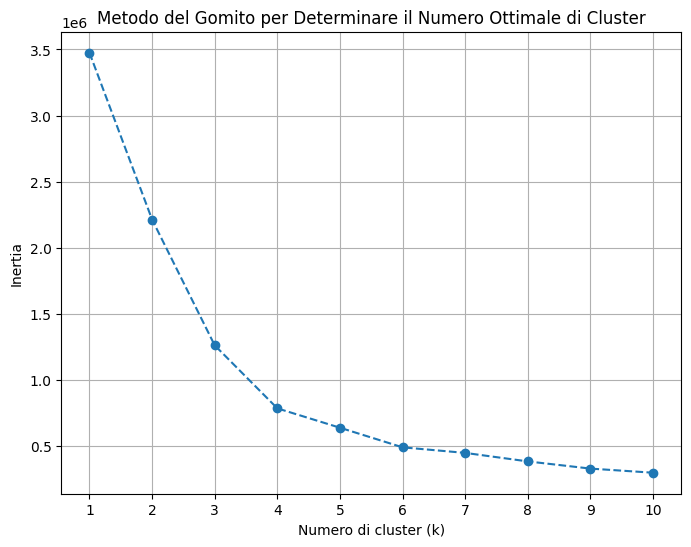

In [13]:
# Utilizzo delle prime due componenti principali per il clustering
pca_two_components = pca_result[:, :2]

# Applicazione del metodo Elbow per determinare il numero ottimale di cluster in K-means
inertia_values = []
k_range = range(1, 11)  # Proviamo con valori di k da 1 a 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_two_components)
    inertia_values.append(kmeans.inertia_)

# Tracciamo il grafico del metodo Elbow
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Numero di cluster (k)')
plt.ylabel('Inertia')
plt.title('Metodo del Gomito per Determinare il Numero Ottimale di Cluster')
plt.xticks(k_range)
plt.grid(True)
plt.show()


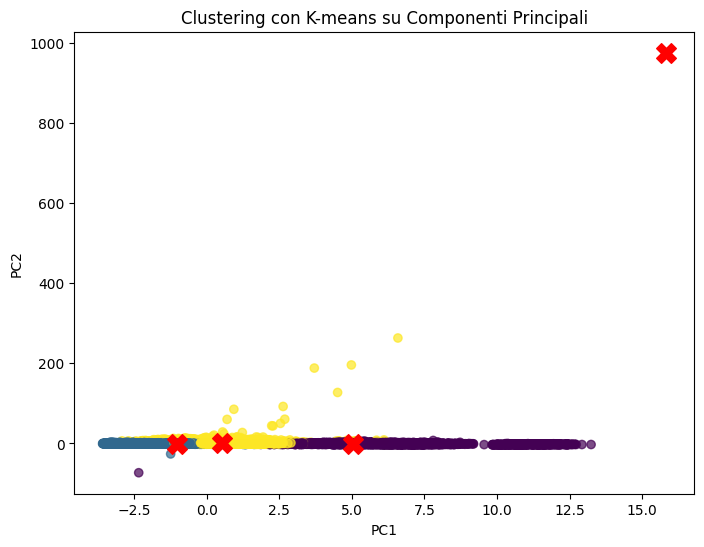

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Applicazione del clustering con K-means (scegliamo arbitrariamente k=3)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_two_components)

# Aggiungiamo i risultati del clustering al DataFrame
df_clustered = pd.DataFrame(pca_two_components, columns=['PC1', 'PC2'])
df_clustered['Cluster'] = kmeans_labels

# Visualizzazione del clustering
plt.figure(figsize=(8, 6))
plt.scatter(df_clustered['PC1'], df_clustered['PC2'], c=df_clustered['Cluster'], cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')  # Centroidi
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering con K-means su Componenti Principali')
plt.show()


### Try select various subsets of features

In [ ]:
dataset = load_dataset('csv', data_files='../dataset/outliers/merged_FE_no_outliers.csv')

df = dataset['train'].to_pandas()

X = df.select_dtypes(include='number').dropna()

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
